VERİ ANALİZİ

Gerekli Kütüphane ve Veri Yükleme

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
df = pd.read_csv('cleaned_health_data .csv')

Keşifsel Veri Analizi

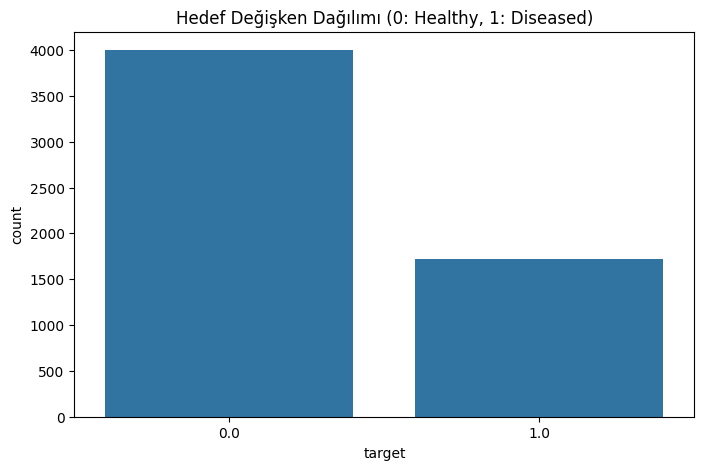

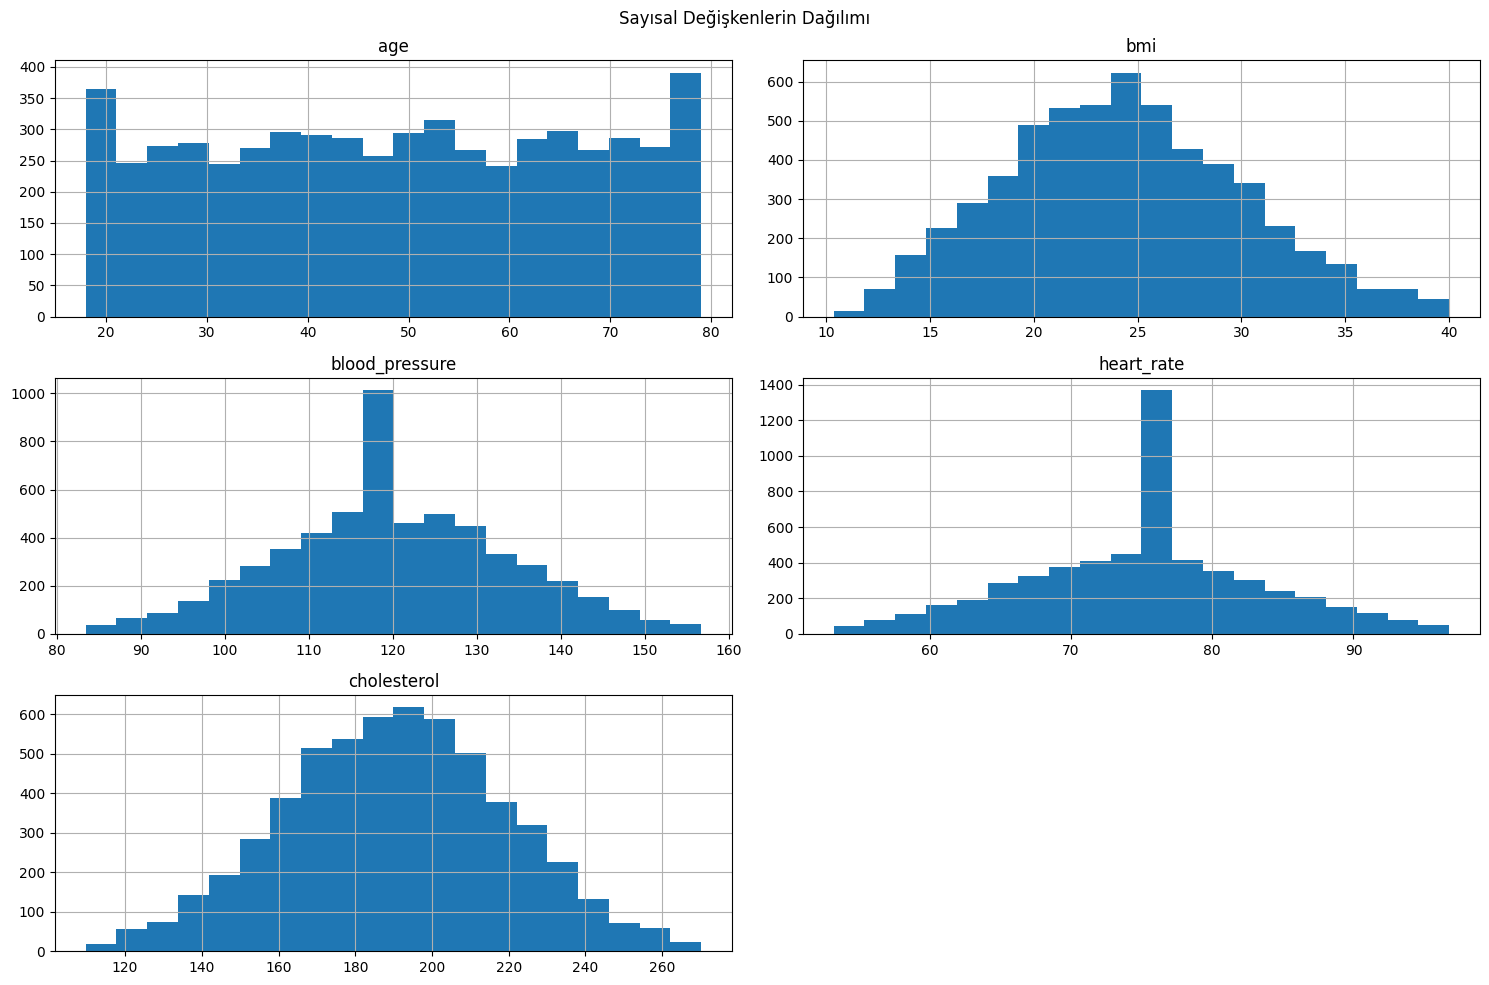

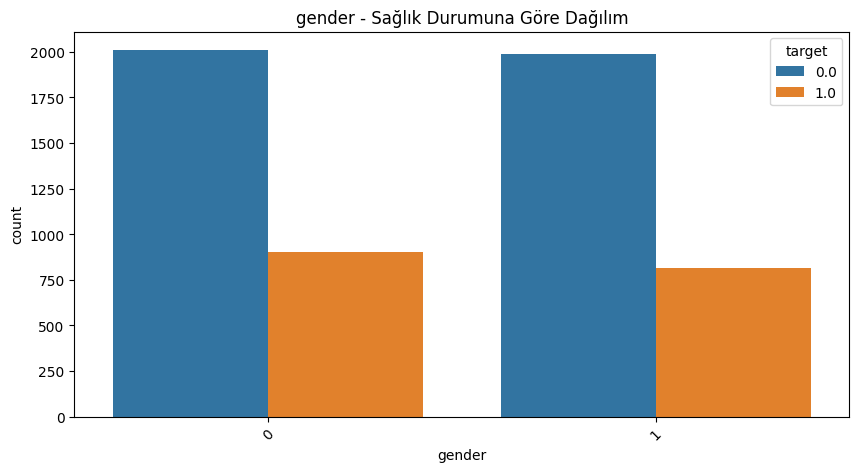

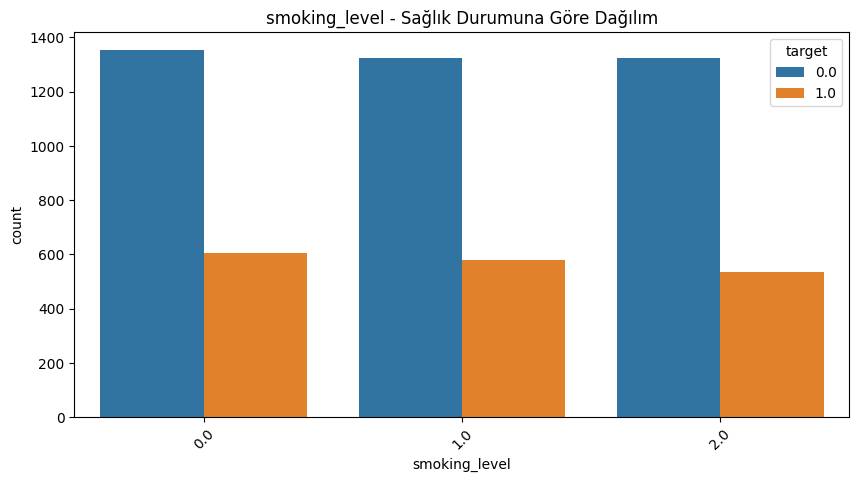

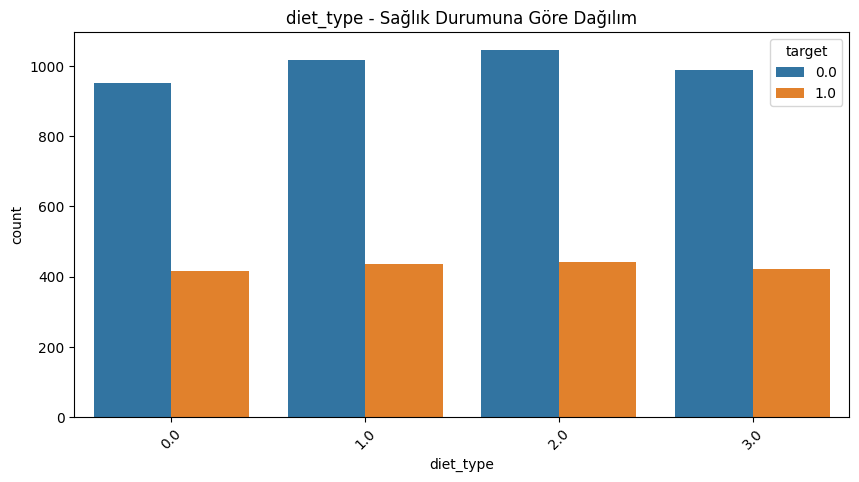

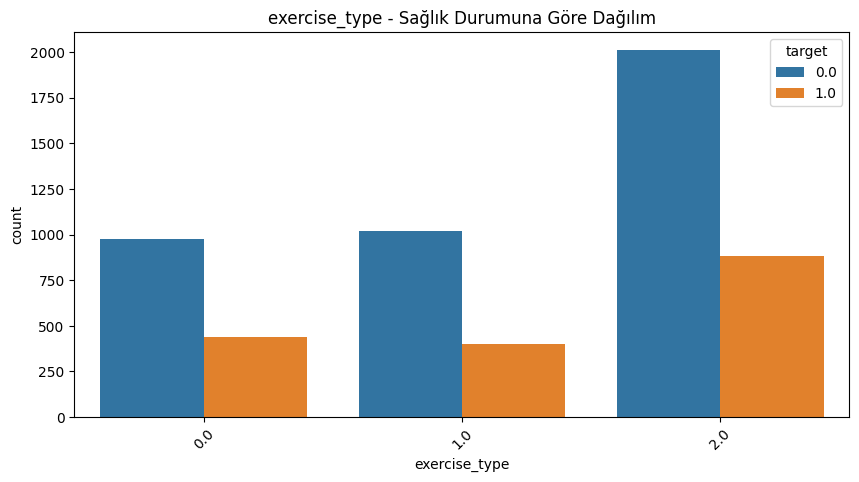

In [ ]:
# Genel görselleştirme ayarları
# plt.style.use('seaborn') # Removed this line
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Hedef değişken dağılımı
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=df)
plt.title('Hedef Değişken Dağılımı (0: Healthy, 1: Diseased)')
plt.show()

# 2. Sayısal değişkenlerin dağılımı
num_cols = ['age', 'bmi', 'blood_pressure', 'heart_rate', 'cholesterol']
df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Sayısal Değişkenlerin Dağılımı')
plt.tight_layout()
plt.show()

# 3. Kategorik değişken analizi
cat_cols = ['gender', 'smoking_level', 'diet_type', 'exercise_type']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} - Sağlık Durumuna Göre Dağılım')
    plt.xticks(rotation=45)
    plt.show()

Korelasyon Analizi

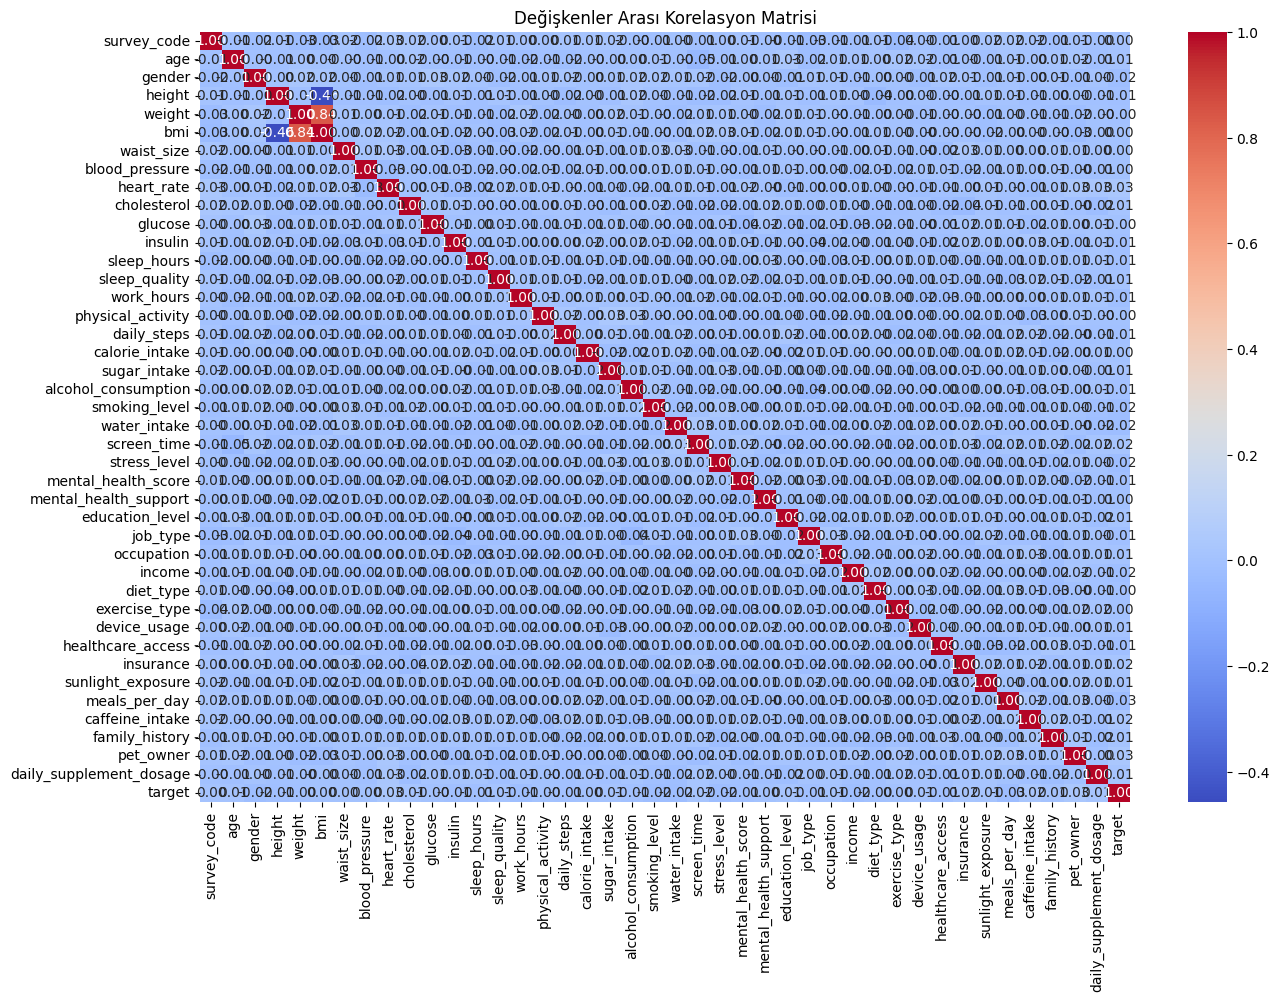

In [ ]:
# Korelasyon analizi
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

BMI(Vücut Kitle Endeksi) ile Yaş İlişkisi

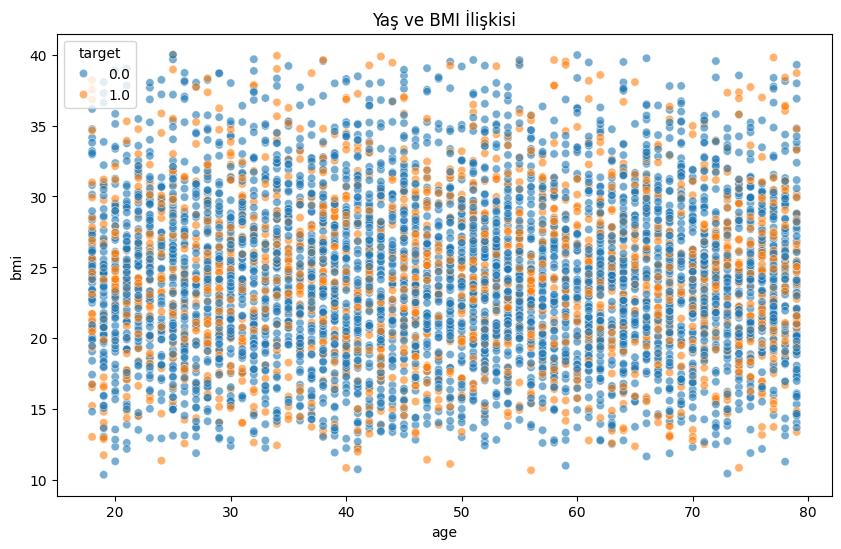

In [ ]:
# BMI ve yaş ilişkisi
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='bmi', hue='target', data=df, alpha=0.6)
plt.title('Yaş ve BMI İlişkisi')
plt.show()

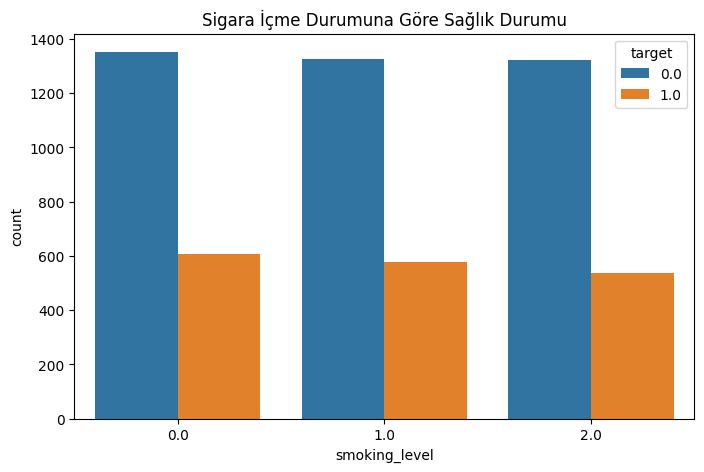

In [ ]:
# Sigara içme durumuna göre sağlık durumu
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_level', hue='target', data=df)
plt.title('Sigara İçme Durumuna Göre Sağlık Durumu')
plt.show()

İstatistiksel Analizler

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency

# 1. Healthy vs Diseased gruplarında sayısal değişkenlerin karşılaştırılması
print("Sayısal Değişkenlerin Karşılaştırılması (Healthy vs Diseased):")
for col in num_cols:
    healthy = df[df['target']==0][col]
    diseased = df[df['target']==1][col]
    t_stat, p_val = ttest_ind(healthy, diseased)
    print(f"{col}: t-stat={t_stat:.2f}, p-value={p_val:.4f}")

# 2. Kategorik değişkenlerin ki-kare testi
print("\nKategorik Değişkenlerin Ki-kare Test Sonuçları:")
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")

Sayısal Değişkenlerin Karşılaştırılması (Healthy vs Diseased):
age: t-stat=-0.53, p-value=0.5972
bmi: t-stat=-0.06, p-value=0.9485
blood_pressure: t-stat=-0.16, p-value=0.8692
heart_rate: t-stat=-2.09, p-value=0.0365
cholesterol: t-stat=-0.72, p-value=0.4704

Kategorik Değişkenlerin Ki-kare Test Sonuçları:
gender: chi2=2.48, p-value=0.1150
smoking_level: chi2=2.24, p-value=0.3260
diet_type: chi2=0.14, p-value=0.9861
exercise_type: chi2=3.08, p-value=0.2143


Boxplot ile Dağılım Karşılaştırması

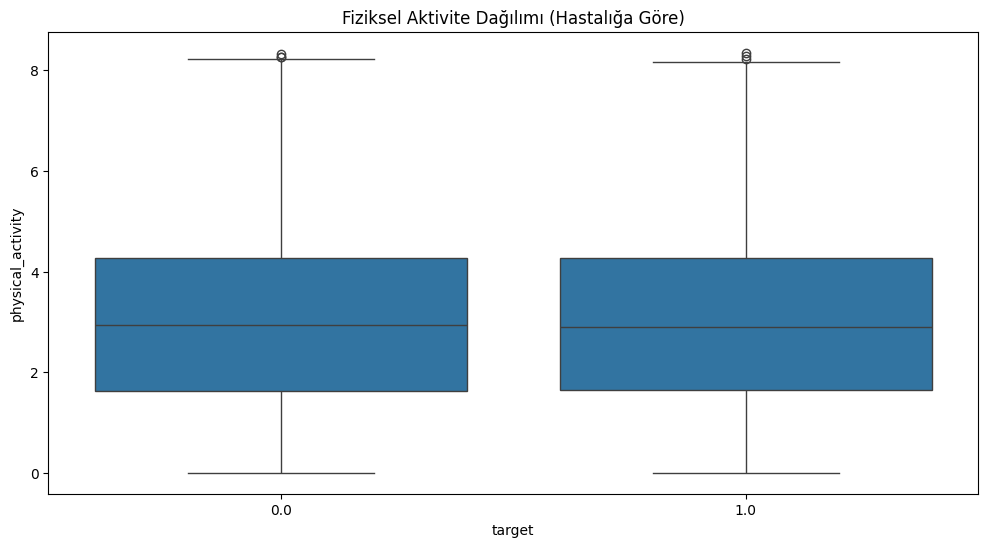

In [ ]:
# Örneğin egzersiz süresi
sns.boxplot(x='target', y='physical_activity', data=df)
plt.title("Fiziksel Aktivite Dağılımı (Hastalığa Göre)")
plt.show()

Z-score ile Aykırı (Outlier) Değer Tespiti

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=1)
df['outlier_count'] = outliers

# En çok outlier barındıran ilk 5 gözlem
print(df.sort_values('outlier_count', ascending=False).head())

      survey_code   age  gender  height  weight    bmi  waist_size  \
5719       5720.0  34.0       1  172.97   74.05  24.75      106.41   
0             1.0  56.0       1  173.42   56.89  18.92       72.17   
1             2.0  69.0       0  163.21   97.80  36.72       85.60   
2             3.0  46.0       1  177.28   80.69  25.67       90.30   
3             4.0  32.0       0  172.10   63.14  21.32      100.50   

      blood_pressure  heart_rate  cholesterol  ...  healthcare_access  \
5719          119.95       87.95       214.93  ...                NaN   
0             118.26       60.75       214.58  ...                2.0   
1             117.92       66.46       115.79  ...                1.0   
2             123.07       76.04       138.13  ...                0.0   
3             148.17       68.78       203.02  ...                1.0   

      insurance  sunlight_exposure  meals_per_day  caffeine_intake  \
5719        NaN                NaN            NaN              NaN   


Chi-Square Testi (Kategorik Değişkenler Arası İlişki)

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['smoking_level'], df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Değeri: {chi2}")
print(f"P-Value: {p}")

Chi-Square Değeri: 2.241967498522862
P-Value: 0.32595897494499293


Eğer p-value < 0.05 ise, “sigara kullanımı ile hastalık arasında istatistiksel olarak anlamlı bir ilişki var” denebilir.

Gruplandırılmış İstatistikler

In [ ]:
df.groupby('smoking_level')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
smoking_level,,,,,,,,
0.0,1958.0,0.309499,0.462405,0.0,0.0,0.0,1.0,1.0
1.0,1903.0,0.303731,0.459989,0.0,0.0,0.0,1.0,1.0
2.0,1858.0,0.287944,0.452927,0.0,0.0,0.0,1.0,1.0


Yaş Gruplarına Göre Analiz

/tmp/ipython-input-12-4047582316.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('yas_grubu')['BMI'].mean().plot(kind='bar', color='skyblue')


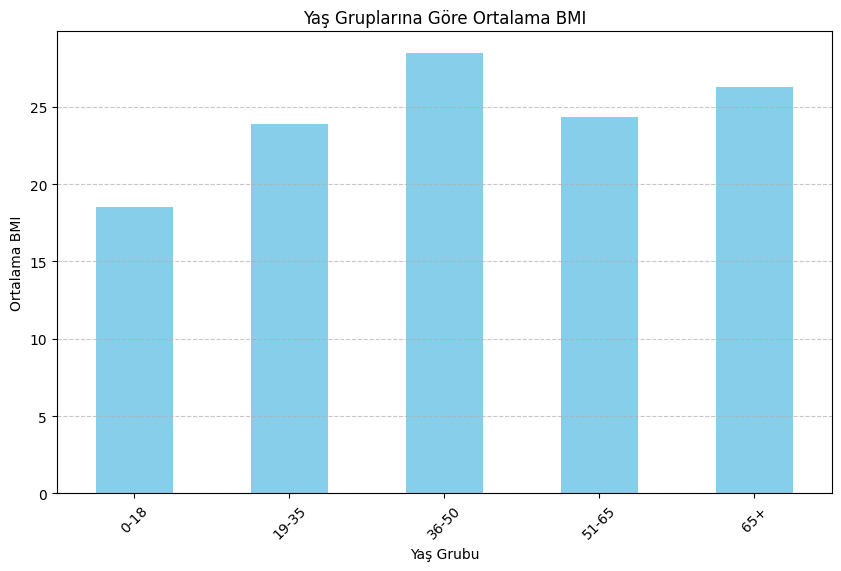

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek veri oluşturma
data = {
    'yas': [15, 25, 32, 47, 55, 70, 22, 38, 60, 28],
    'BMI': [18.5, 22.3, 25.1, 27.8, 24.9, 26.3, 21.7, 29.1, 23.8, 26.5],
    'sigara_iciyor': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Yaş grupları oluşturma
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['yas_grubu'] = pd.cut(df['yas'], bins=bins, labels=labels)

# Yaş gruplarına göre ortalama BMI
plt.figure(figsize=(10, 6))
df.groupby('yas_grubu')['BMI'].mean().plot(kind='bar', color='skyblue')
plt.title('Yaş Gruplarına Göre Ortalama BMI')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama BMI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Çoklu Değişken Analizi – Pairlot

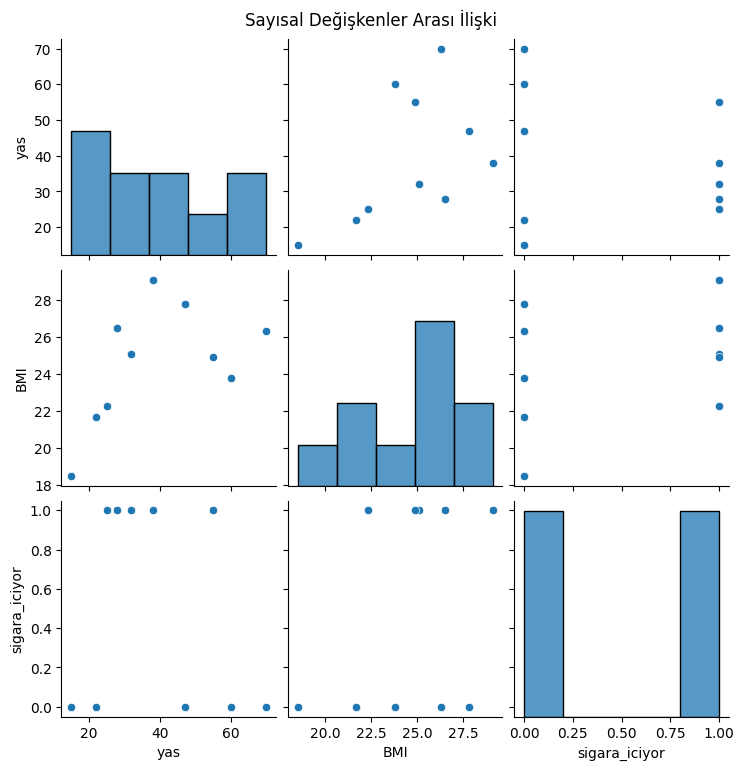

In [ ]:
import seaborn as sns

# Sadece sayısal sütunları filtrele
num_cols = df.select_dtypes(include='number').columns

# Pairplot çiz
sns.pairplot(df[num_cols])
plt.suptitle("Sayısal Değişkenler Arası İlişki", y=1.02)
plt.show()

Cinsiyete Göre Sağlık Profili Karşılaştırması

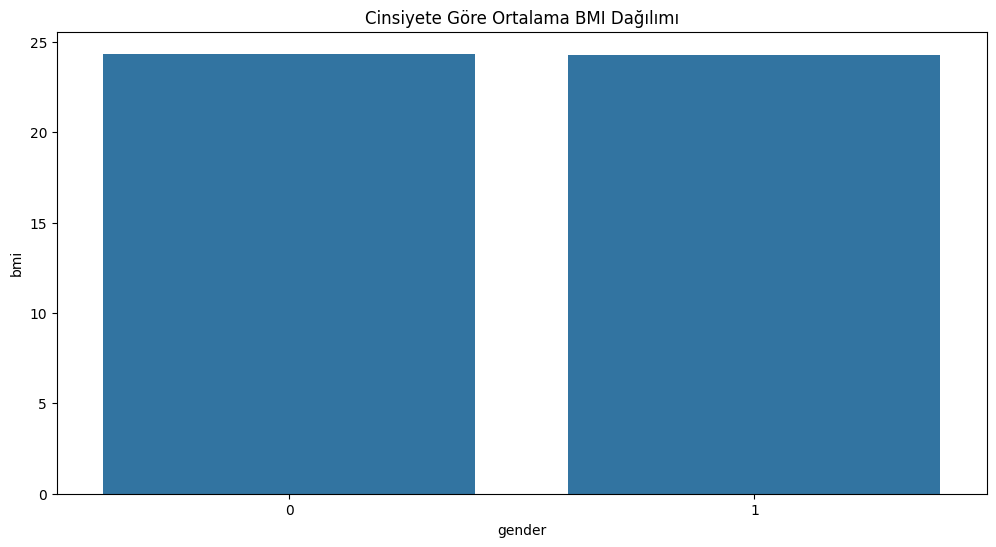

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri yükleme
df = pd.read_csv('cleaned_health_data .csv')

# Cinsiyete göre gruplama ve istatistikler
gender_stats = df.groupby('gender').agg({
    'bmi': 'mean',
    'blood_pressure': 'median',
    'heart_rate': 'mean',
    'stress_level': 'mean'
}).reset_index()

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='bmi', data=df, errorbar=None)
plt.title('Cinsiyete Göre Ortalama BMI Dağılımı')
plt.show()

# BMI kategorileri oluşturup analiz
df['bmi_category'] = pd.cut(df['bmi'],
                           bins=[0, 18.5, 25, 30, float('inf')],
                           labels=['underweight', 'normal', 'overweight', 'obese'])

Uyku Kalitesi ile Ruh Sağlığı Arasındaki İlişki

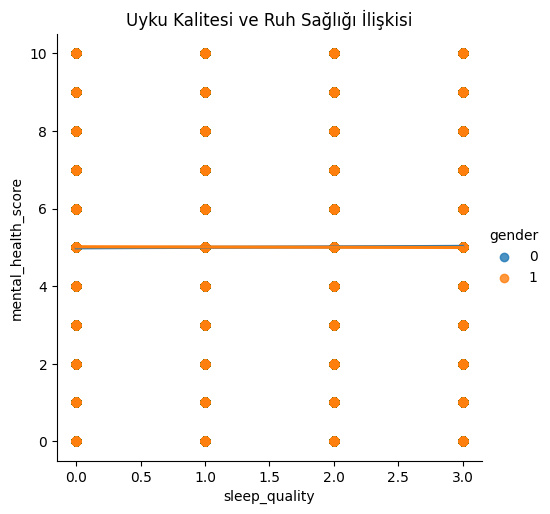

In [ ]:
# Korelasyon analizi
correlation = df[['sleep_quality', 'mental_health_score']].corr()

# Scatter plot
sns.lmplot(x='sleep_quality', y='mental_health_score', data=df, hue='gender')
plt.title('Uyku Kalitesi ve Ruh Sağlığı İlişkisi')
plt.show()

Stres – Ruh Sağlığı – Fiziksel Aktivite Üçlü İlişkisi

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


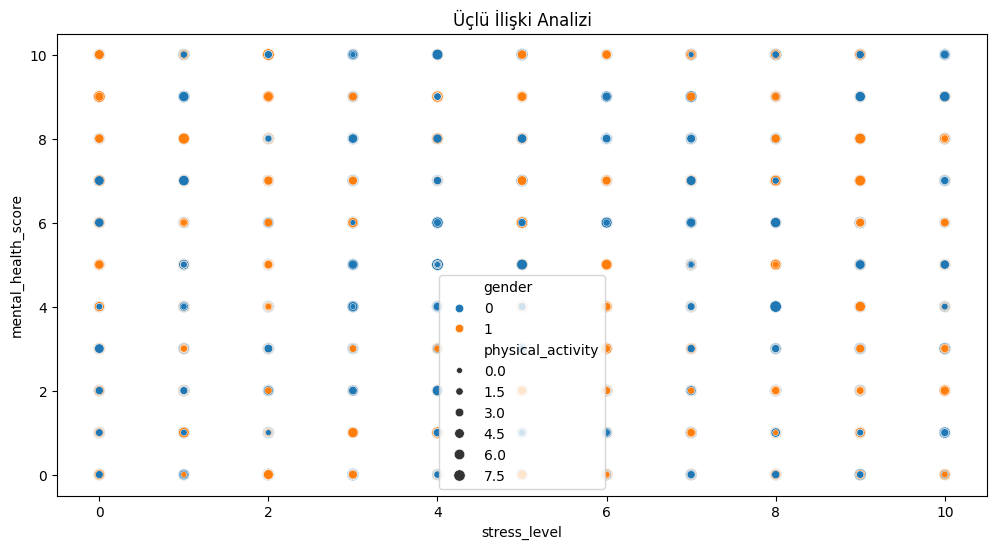

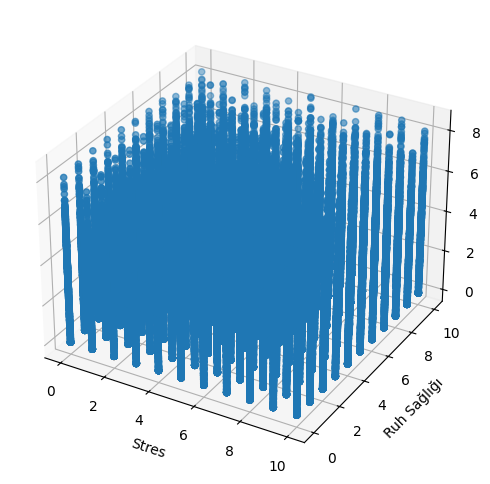

In [ ]:
sns.scatterplot(x='stress_level', y='mental_health_score',
                size='physical_activity', hue='gender', data=df)
plt.title('Üçlü İlişki Analizi')
plt.show()

# 3D plot (isteğe bağlı)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['stress_level'], df['mental_health_score'], df['physical_activity'])
ax.set_xlabel('Stres')
ax.set_ylabel('Ruh Sağlığı')
ax.set_zlabel('Fiziksel Aktivite')
plt.show()

Günlük Adım Sayısına Göre Hastalık Riski Dağılımı

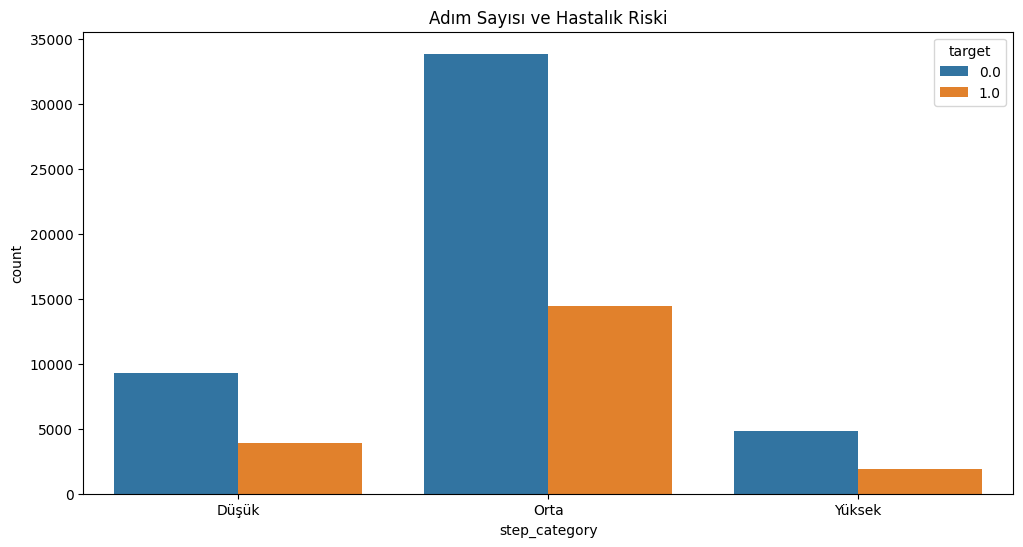

In [ ]:
# Adım sayısına göre kategorize etme
df['step_category'] = pd.cut(df['daily_steps'],
                            bins=[0, 5000, 10000, float('inf')],
                            labels=['Düşük', 'Orta', 'Yüksek'])

# Risk dağılımı
sns.countplot(x='step_category', hue='target', data=df)
plt.title('Adım Sayısı ve Hastalık Riski')
plt.show()

Aile Geçmişi ve Çevresel Faktörlerin Etkisi

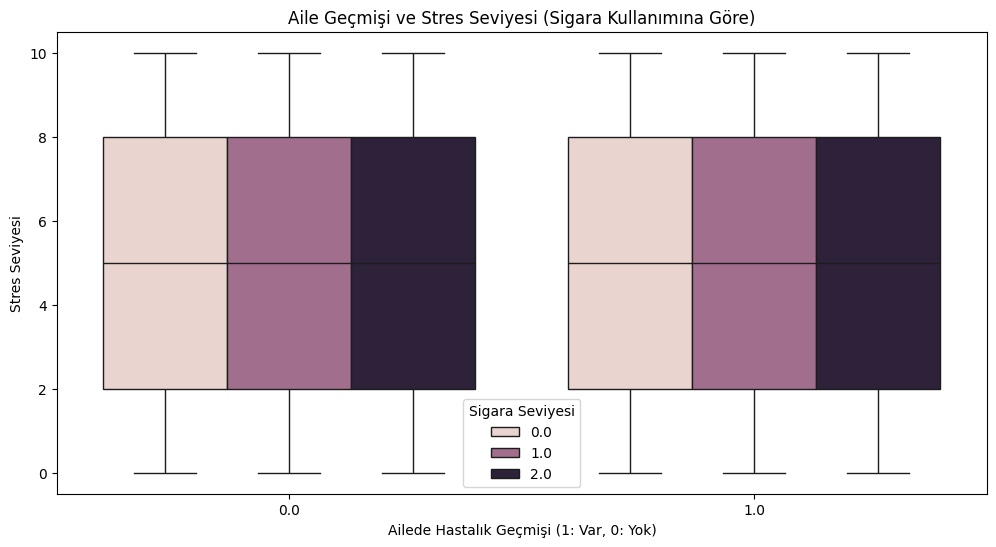

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Aile geçmişi ile çevresel faktörlerin (sigara, alkol, stres) ilişkisi
sns.boxplot(x='family_history', y='stress_level',
            hue='smoking_level', data=df)
plt.title('Aile Geçmişi ve Stres Seviyesi (Sigara Kullanımına Göre)')
plt.xlabel('Ailede Hastalık Geçmişi (1: Var, 0: Yok)')
plt.ylabel('Stres Seviyesi')
plt.legend(title='Sigara Seviyesi')
plt.show()

Çevresel Risk Skoru Oluşturma

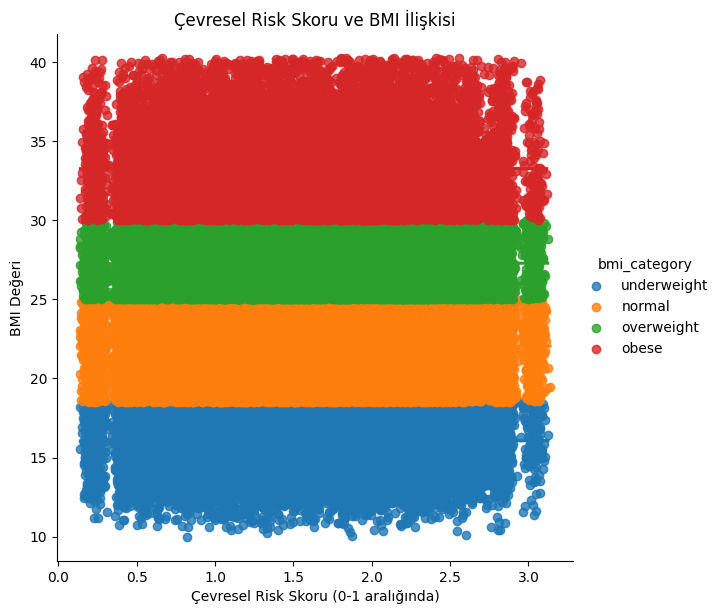

In [ ]:
# Çevresel risk skoru hesapla (örnek formül)
df['env_risk_score'] = (
    df['smoking_level'] * 0.3 +
    df['alcohol_consumption'] * 0.2 +
    df['stress_level'] * 0.2 +
    (1 - df['sleep_quality']/10) * 0.2 +
    df['screen_time']/10 * 0.1
)

# BMI ile çevresel risk ilişkisi
sns.lmplot(x='env_risk_score', y='bmi',
           hue='bmi_category', data=df, height=6)
plt.title('Çevresel Risk Skoru ve BMI İlişkisi')
plt.xlabel('Çevresel Risk Skoru (0-1 aralığında)')
plt.ylabel('BMI Değeri')
plt.show()

Genetik Yerine Biyometrik İşaretçiler

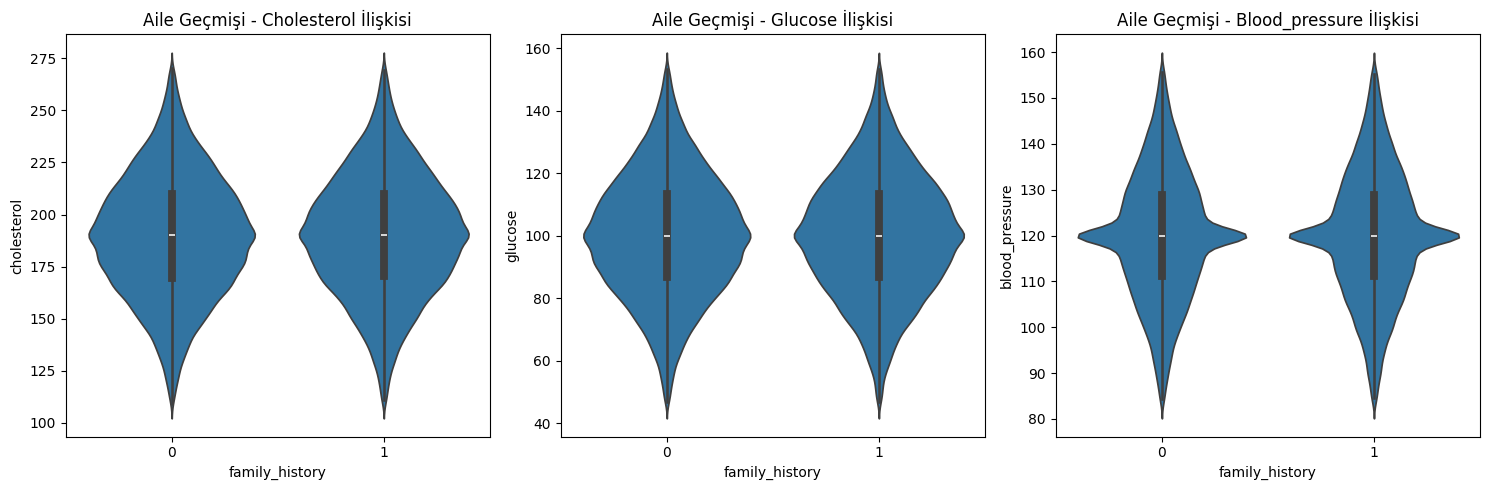

In [ ]:
# Biyometrik belirteçlerin dağılımı (kolesterol, glukoz, tansiyon)
bio_vars = ['cholesterol', 'glucose', 'blood_pressure']

plt.figure(figsize=(15, 5))
for i, var in enumerate(bio_vars, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='family_history', y=var, data=df)
    plt.title(f'Aile Geçmişi - {var.capitalize()} İlişkisi')
plt.tight_layout()
plt.show()

Destekleyici Analiz (Beslenme ve Çevresel Etki)

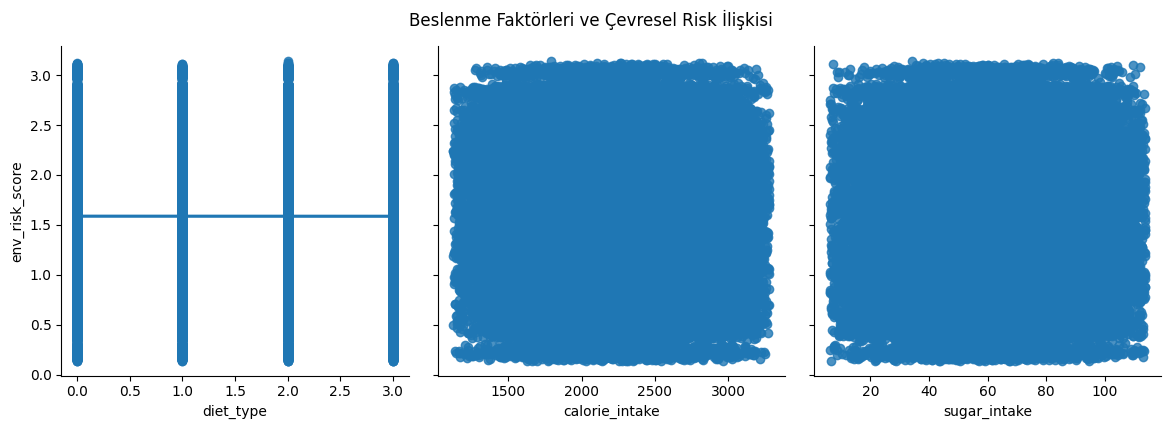

In [ ]:
# Beslenme faktörlerinin çevresel riskle ilişkisi
nutrition_vars = ['diet_type', 'calorie_intake', 'sugar_intake']

g = sns.PairGrid(df, x_vars=nutrition_vars,
                y_vars=['env_risk_score'], height=4)
g.map(sns.regplot)
g.fig.suptitle('Beslenme Faktörleri ve Çevresel Risk İlişkisi', y=1.05)
plt.show()

Tüm Faktörlerin Kombine Etkisi

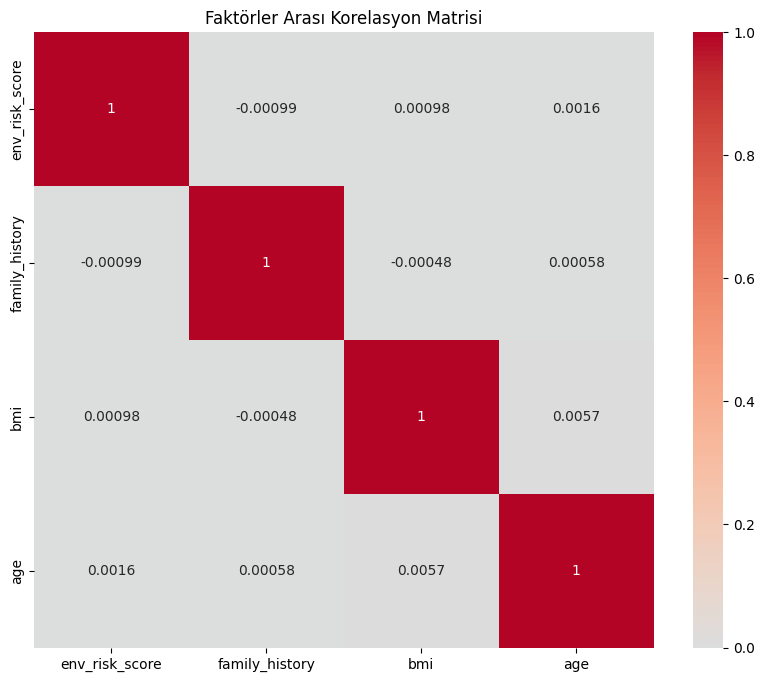

In [ ]:
from sklearn.preprocessing import StandardScaler

# Önemli faktörleri seçme
factors = ['env_risk_score', 'family_history', 'bmi', 'age']
X = df[factors].dropna()

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=factors).corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Faktörler Arası Korelasyon Matrisi')
plt.show()

Sağlık Sigortası ve Hedef Sınıf Dağılımı

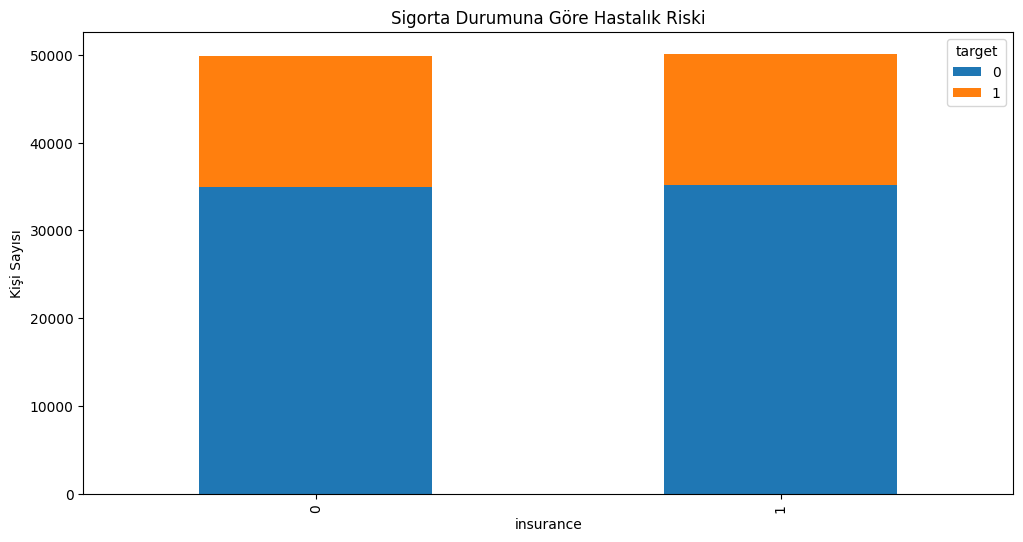

In [ ]:
pd.crosstab(df['insurance'], df['target']).plot(kind='bar', stacked=True)
plt.title('Sigorta Durumuna Göre Hastalık Riski')
plt.ylabel('Kişi Sayısı')
plt.show()

Beslenme Faktörleri ile Risk İlişkisi

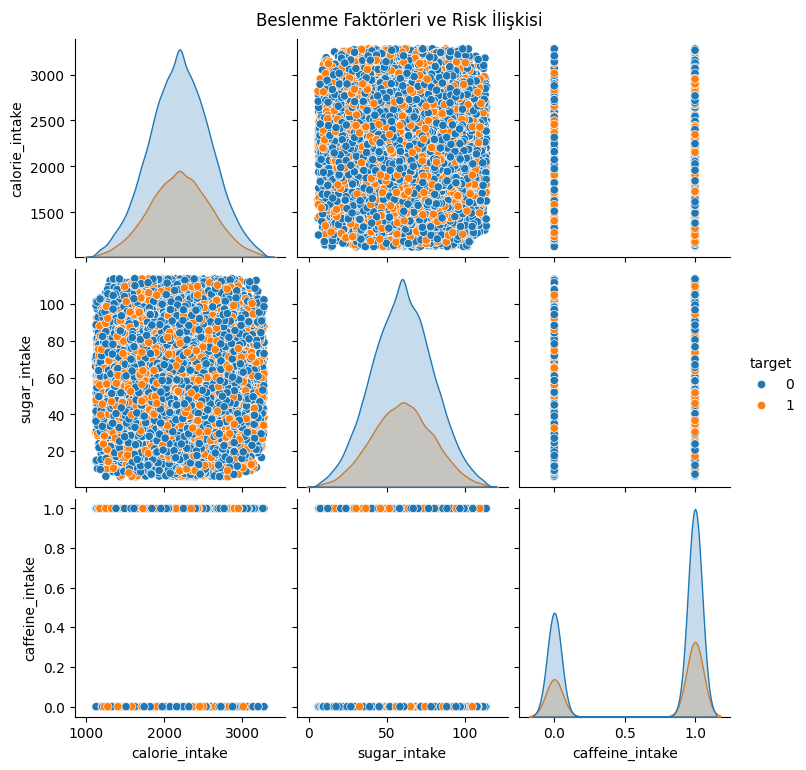

In [ ]:
nutrition_cols = ['calorie_intake', 'sugar_intake', 'caffeine_intake']
sns.pairplot(df[nutrition_cols + ['target']], hue='target')
plt.suptitle('Beslenme Faktörleri ve Risk İlişkisi', y=1.02)
plt.show()

Metinsel Veri İçermeyen Bir Veri Setine NLP Teknikleri Uygulanması

Sayısal/Kategorik Sütunları Metne Dönüştürerek NLP

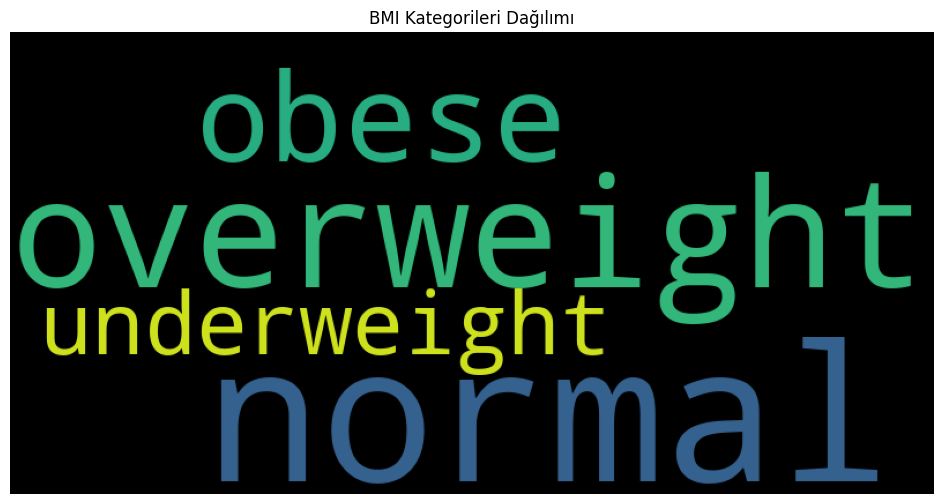

In [ ]:
# Örnek: BMI kategorileri oluşturup analiz
df['bmi_category'] = pd.cut(df['bmi'],
                           bins=[0, 18.5, 25, 30, float('inf')],
                           labels=['underweight', 'normal', 'overweight', 'obese'])

# BMI kategorilerinin dağılımı
from wordcloud import WordCloud
text_data = " ".join(df['bmi_category'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("BMI Kategorileri Dağılımı")
plt.show()

Sayısal Verilerden Metinsel Özet Çıkarma

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Sayısal sütunları kategorik hale getirme
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['stress_level_category'] = discretizer.fit_transform(df[['stress_level']]).astype(int)

# Kategorik değerleri metne çevirme
stress_labels = {0: 'low stress', 1: 'medium stress', 2: 'high stress'}
df['stress_label'] = df['stress_level_category'].map(stress_labels)

# Metinsel analiz
text = " ".join(df['stress_label'])
print(f"Stres durumu özeti: {text[:200]}...")  # İlk 200 karakter

Stres durumu özeti: low stress medium stress low stress high stress high stress high stress high stress high stress low stress high stress high stress low stress medium stress medium stress low stress high stress high st...


Yapay Metin Üretme ve Analiz

In [ ]:
# Mevcut verilerden sentetik metin üretme
def generate_health_summary(row):
    return (f"{row['gender']}, {row['age']} yaşında. "
            f"BMI: {row['bmi']:.1f}. "
            f"Stres seviyesi: {row['stress_level']}/10. "
            f"Uyku kalitesi: {row['sleep_quality']}/10.")

df['health_summary'] = df.apply(generate_health_summary, axis=1)

# Örnek çıktılar
print(df['health_summary'].head(3))

# Basit kelime analizi
from collections import Counter
words = " ".join(df['health_summary']).lower().split()
common_words = Counter(words).most_common(20)
print("\nEn sık kullanılan 20 kelime:", common_words)

0    1, 56.0 yaşında. BMI: 18.9. Stres seviyesi: 2....
1    0, 69.0 yaşında. BMI: 36.7. Stres seviyesi: 3....
2    1, 46.0 yaşında. BMI: 25.7. Stres seviyesi: 0....
Name: health_summary, dtype: object

En sık kullanılan 20 kelime: [('yaşında.', 100000), ('bmi:', 100000), ('stres', 100000), ('seviyesi:', 100000), ('uyku', 100000), ('kalitesi:', 100000), ('1,', 50132), ('0,', 49868), ('2/10.', 25147), ('0/10.', 25091), ('1/10.', 25008), ('3/10.', 24754), ('6.0/10.', 9333), ('5.0/10.', 9216), ('1.0/10.', 9187), ('0.0/10.', 9103), ('7.0/10.', 9096), ('4.0/10.', 9079), ('8.0/10.', 9076), ('3.0/10.', 9037)]


Veri Seti Özeti Oluşturma (NLP Formatında)

In [ ]:
# Tüm veri seti için metinsel özet
summary = f"""
Veri seti özeti:
- Toplam {len(df)} hasta kaydı
- Ortalama yaş: {df['age'].mean():.1f}
- Cinsiyet dağılımı: {df['gender'].value_counts().to_dict()}
- En yaygın 3 BMI kategorisi: {df['bmi_category'].value_counts().nlargest(3).to_dict()}
"""

print(summary)

# Özeti dosyaya kaydetme
with open("dataset_summary.txt", "w") as f:
    f.write(summary)


Veri seti özeti:
- Toplam 100000 hasta kaydı
- Ortalama yaş: 48.5
- Cinsiyet dağılımı: {1: 50132, 0: 49868}
- En yaygın 3 BMI kategorisi: {'normal': 40669, 'overweight': 26843, 'obese': 16480}



Tüm Analizleri Otomatikleştiren Fonksiyon

In [ ]:
def auto_analyze(df):
    reports = []

    # 1. Gender Analysis
    gender_report = df.groupby('gender').mean(numeric_only=True)
    reports.append(("Cinsiyet Analizi", gender_report))

    # 2. Correlation Matrix
    # Select only numeric columns before calculating correlation
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()
    reports.append(("Korelasyon Matrisi", corr_matrix))

    # 3. Target Distribution
    target_dist = df['target'].value_counts(normalize=True)
    reports.append(("Hedef Dağılımı", target_dist))

    return reports

# Raporları görüntüleme
for title, report in auto_analyze(df):
    print(f"\n{title}\n{'='*30}")
    print(report)


Cinsiyet Analizi
         survey_code        age      height     weight        bmi  waist_size  \
gender                                                                          
0       49835.812385  48.523763  170.005553  69.987252  24.348122   84.892583   
1       50164.320354  48.528206  170.055774  69.840474  24.284768   84.983617   

        blood_pressure  heart_rate  cholesterol     glucose  ...  insurance  \
gender                                                       ...              
0           119.976247   74.995081   190.041706  100.099686  ...   0.501584   
1           119.980186   75.034849   189.959377   99.927660  ...   0.500838   

        sunlight_exposure  meals_per_day  caffeine_intake  family_history  \
gender                                                                      
0                1.000201       2.988450         0.662870        0.498837   
1                1.007181       3.008936         0.669752        0.502254   

        pet_owner  daily_supple

Spark Session Başlatma

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, mean, stddev
import pandas as pd

# Spark session oluşturma (4 CPU çekirdeği kullanarak)
spark = SparkSession.builder \
    .appName("HealthDataAnalysis") \
    .master("local[4]") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

# Load the data into a Pandas DataFrame first
df = pd.read_csv('cleaned_health_data .csv')

# Create the 'step_category' column in the Pandas DataFrame
df['step_category'] = pd.cut(df['daily_steps'],
                            bins=[0, 5000, 10000, float('inf')],
                            labels=['Düşük', 'Orta', 'Yüksek'])

# Create the 'bmi_category' column in the Pandas DataFrame
df['bmi_category'] = pd.cut(df['bmi'],
                           bins=[0, 18.5, 25, 30, float('inf')],
                           labels=['underweight', 'normal', 'overweight', 'obese'])


# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)
# Aşağıdaki satır, kod geliştirme ve test süreçlerini hızlandırmak için
# Tüm veri yerine %10'luk bir örnekle çalışarak kodu hızlıca test et
# df_sample = df.sample(frac=0.1)

# Veya sadece ilk 1000 satırı al
# df_sample = df.limit(1000)

# Geliştirmenizi df_sample üzerinde yapın

Veri Keşfi (Exploratory Data Analysis)

In [ ]:
# Temel istatistikler
numeric_cols = ['age', 'bmi', 'stress_level', 'heart_rate']
spark_df.select(numeric_cols).describe().show()

# Korelasyon analizi
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

vector_col = "features"
assembler = VectorAssembler(inputCols=numeric_cols, outputCol=vector_col)
df_vector = assembler.transform(spark_df).select(vector_col)

corr_matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
print("Korelasyon Matrisi:\n", corr_matrix.toArray())

+-------+------------------+-----------------+-----------------+-----------------+
|summary|               age|              bmi|     stress_level|       heart_rate|
+-------+------------------+-----------------+-----------------+-----------------+
|  count|            100000|           100000|           100000|           100000|
|   mean|          48.52599|24.31636139999997|           4.9916|75.01501730000496|
| stddev|17.886767843423783|5.662504024202396|3.154997461185952| 8.30821135681202|
|    min|              18.0|             9.99|              0.0|            53.16|
|    max|              79.0|            40.24|             10.0|            96.85|
+-------+------------------+-----------------+-----------------+-----------------+

Korelasyon Matrisi:
 [[ 1.          0.00568238  0.00129267 -0.00426065]
 [ 0.00568238  1.          0.0013287   0.00160134]
 [ 0.00129267  0.0013287   1.         -0.0023391 ]
 [-0.00426065  0.00160134 -0.0023391   1.        ]]


Veri Temizleme ve Ön İşleme

In [ ]:
# Eksik değerleri median ile doldurma
from pyspark.sql.functions import lit

for col_name in numeric_cols:
    median_val = spark_df.approxQuantile(col_name, [0.5], 0.01)[0]
    spark_df = spark_df.fillna(median_val, subset=[col_name])

# Aykırı değer kontrolü (IQR yöntemi)
for col_name in numeric_cols:
    stats = spark_df.select(
        mean(col(col_name)).alias('mean'),
        stddev(col(col_name)).alias('std')
    ).collect()[0]

    spark_df = spark_df.withColumn(
        f"{col_name}_outlier",
        when(
            (col(col_name) > stats['mean'] + 3*stats['std']) |
            (col(col_name) < stats['mean'] - 3*stats['std']),
            lit(1)
        ).otherwise(lit(0))
    )

# Kategorik değişkenleri işleme
from pyspark.ml.feature import StringIndexer

categorical_cols = ['gender', 'bmi_category', 'step_category']
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]

for indexer in indexers:
    spark_df = indexer.fit(spark_df).transform(spark_df)

Feature Engineering

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Özellik vektörü oluşturma
feature_cols = numeric_cols + [col+"_index" for col in categorical_cols]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="raw_features")

# Ölçeklendirme
scaler = StandardScaler(inputCol="raw_features", outputCol="scaled_features")

# Pipeline oluşturma
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, scaler])
processed_df = pipeline.fit(spark_df).transform(spark_df)

Makine Öğrenmesi (PySpark ML)

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train-test ayırma
train_df, test_df = processed_df.randomSplit([0.7, 0.3], seed=42)

# Model eğitimi
rf = RandomForestClassifier(
    featuresCol="scaled_features",
    labelCol="target",
    numTrees=100,
    maxDepth=5
)

model = rf.fit(train_df)

# Tahminler
predictions = model.transform(test_df)

# Metrikler
evaluator = MulticlassClassificationEvaluator(labelCol="target")
print(f"Accuracy: {evaluator.evaluate(predictions, {evaluator.metricName: 'accuracy'})}")
print(f"F1 Score: {evaluator.evaluate(predictions, {evaluator.metricName: 'f1'})}")

Accuracy: 0.700896304004834
F1 Score: 0.5776432435192599


Görselleştirme (Spark -> Pandas)

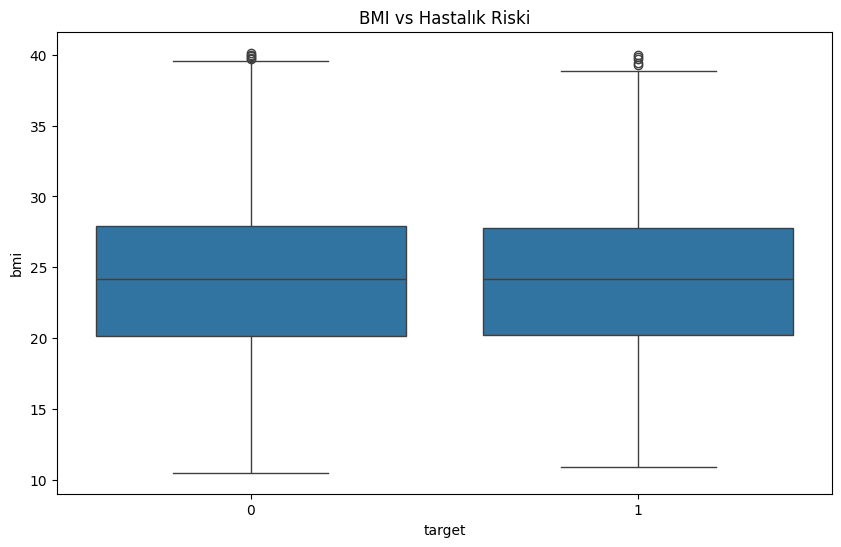

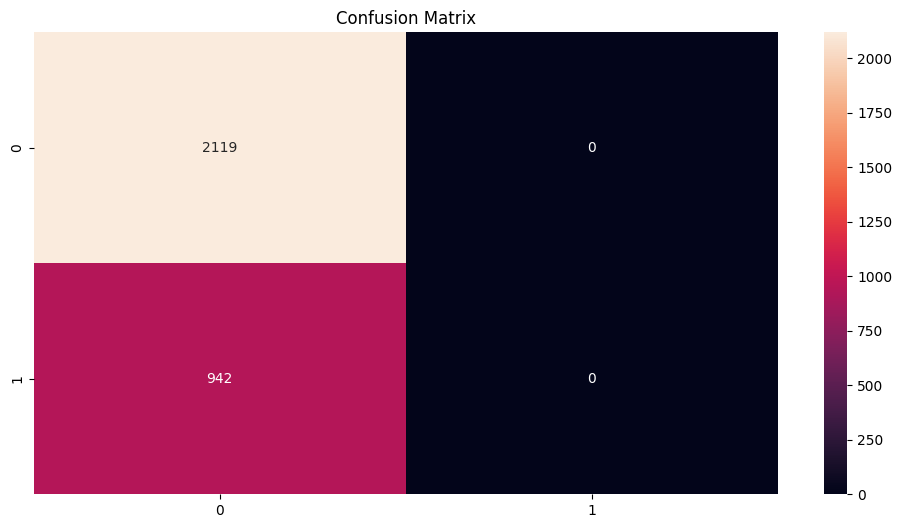

In [ ]:
# Spark DataFrame'den örneklem alarak görselleştirme
sample_pd = predictions.sample(0.1).toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

# BMI dağılımı
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='bmi', data=sample_pd)
plt.title("BMI vs Hastalık Riski")
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sample_pd['target'], sample_pd['prediction'])
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Optimizasyon (Cross-Validation)

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [3, 5]) \
    .build()

cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=3
)

cv_model = cv.fit(train_df)
print("En iyi model F1 skoru:", cv_model.avgMetrics[0])

En iyi model F1 skoru: 0.5777836177089232


Sonuçları Kaydetme

In [ ]:
# Modeli kaydetme
model.write().overwrite().save("spark_random_forest_model")

# Predictions'ı CSV olarak yazma
predictions.select("target", "prediction").write.mode("overwrite").csv("predictions_output")

Spark UI Erişimi

In [ ]:
# Spark UI'ı görüntülemek için (localhost:4040)
input("Analiz tamamlandı. Spark UI için http://localhost:4040 adresini ziyaret edin...")

KeyboardInterrupt: Interrupted by user

MAKİNE ÖĞRENMESİ

Veri Hazırlama

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import pandas as pd

# Recreate the columns that were lost after reloading the DataFrame
# Sayısal sütunları kategorik hale getirme
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['stress_level_category'] = discretizer.fit_transform(df[['stress_level']]).astype(int)

# Kategorik değerleri metne çevirme
stress_labels = {0: 'low stress', 1: 'medium stress', 2: 'high stress'}
df['stress_label'] = df['stress_level_category'].map(stress_labels)

# Mevcut verilerden sentetik metin üretme
def generate_health_summary(row):
    return (f"{row['gender']}, {row['age']} yaşında. "
            f"BMI: {row['bmi']:.1f}. "
            f"Stres seviyesi: {row['stress_level']}/10. "
            f"Uyku kalitesi: {row['sleep_quality']}/10.")

df['health_summary'] = df.apply(generate_health_summary, axis=1)


# Özellikler ve hedef değişken
X = df.drop(['target', 'health_summary', 'stress_label'], axis=1)  # Metin sütunlarını çıkar
y = df['target']

# Kategorik değişkenleri işleme
X = pd.get_dummies(X, columns=['bmi_category', 'step_category'])

# Eksik verileri doldurma
X.fillna(X.mean(), inplace=True)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim-test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

K-Means Kümeleme

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score: {score:.3f}")

# En iyi k değeri ile modelleme
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleri veri setine ekleme
df['cluster'] = clusters

K=2, Silhouette Score: 0.054
K=3, Silhouette Score: 0.036
K=4, Silhouette Score: 0.047
K=5, Silhouette Score: 0.048


K-Means için Görselleştirme

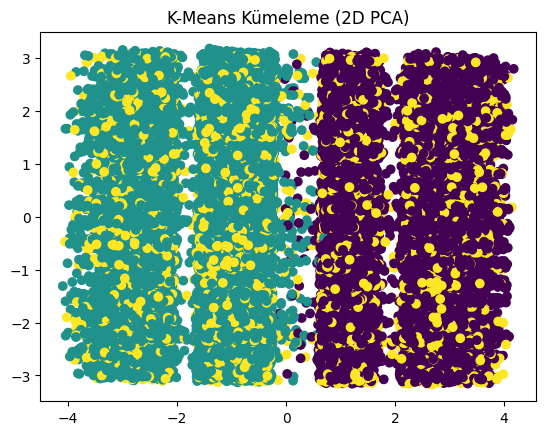

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title('K-Means Kümeleme (2D PCA)')
plt.show()

XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Performans:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

XGBoost Performans:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     21023
           1       0.31      0.03      0.06      8977

    accuracy                           0.69     30000
   macro avg       0.51      0.50      0.44     30000
weighted avg       0.58      0.69      0.59     30000

F1 Score: 0.5882


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nRandom Forest Performans:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Random Forest Performans:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     21023
           1       0.11      0.00      0.00      8977

    accuracy                           0.70     30000
   macro avg       0.41      0.50      0.41     30000
weighted avg       0.52      0.70      0.58     30000

F1 Score: 0.5774


Karar Ağaçları

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("\nKarar Ağacı Performans:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Karar Ağacı Performans:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     21023
           1       0.30      0.31      0.30      8977

    accuracy                           0.57     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.58      0.57      0.58     30000

F1 Score: 0.5760


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("\nNaive Bayes Performans:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Naive Bayes Performans:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     21023
           1       0.00      0.00      0.00      8977

    accuracy                           0.70     30000
   macro avg       0.35      0.50      0.41     30000
weighted avg       0.49      0.70      0.58     30000

F1 Score: 0.5775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVR (Support Vector Regression)

In [ ]:
from sklearn.svm import SVC

svr = SVC(kernel='rbf', random_state=42)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("\nSVR Performans:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


SVR Performans:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     21023
           1       0.00      0.00      0.00      8977

    accuracy                           0.70     30000
   macro avg       0.35      0.50      0.41     30000
weighted avg       0.49      0.70      0.58     30000

F1 Score: 0.5775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Karşılaştırma

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import time # Süreyi ölçmek için time kütüphanesini ekleyelim

# Modelleri tanımla (Şimdilik en yavaş olan SVM'i yorum satırı yapabiliriz)
models = {
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    #'SVM': SVC(kernel='rbf', random_state=42) # <-- Test için geçici olarak devre dışı bırak
}

results = []
print("Model eğitimi ve değerlendirme süreci başladı...")
print("-" * 50)

# Döngü içine teşhis amaçlı print ve süre ölçümü ekleyelim
for name, model in models.items():
    print(f"[{time.strftime('%H:%M:%S')}] Model eğitiliyor: {name}...")

    start_time = time.time()

    # 1. Eğitim
    model.fit(X_train, y_train)

    # 2. Tahmin
    y_pred = model.predict(X_test)

    # 3. Skoru Hesaplama
    f1 = f1_score(y_test, y_pred, average='weighted')

    end_time = time.time()
    duration = end_time - start_time

    print(f"-> {name} tamamlandı. Süre: {duration:.2f} saniye. F1 Skoru: {f1:.4f}")

    results.append({'Model': name, 'F1 Score': f1, 'Eğitim Süresi (s)': duration})

print("-" * 50)
print("Tüm modellerin değerlendirmesi tamamlandı.")

# Sonuçları DataFrame'e çevir ve göster
results_df = pd.DataFrame(results).sort_values('F1 Score', ascending=False)

print("\nModel Karşılaştırması:")
print(results_df)

Model eğitimi ve değerlendirme süreci başladı...
--------------------------------------------------
[17:29:36] Model eğitiliyor: XGBoost...
-> XGBoost tamamlandı. Süre: 2.51 saniye. F1 Skoru: 0.5887
[17:29:38] Model eğitiliyor: Random Forest...
-> Random Forest tamamlandı. Süre: 77.38 saniye. F1 Skoru: 0.5777
[17:30:56] Model eğitiliyor: Decision Tree...
-> Decision Tree tamamlandı. Süre: 7.35 saniye. F1 Skoru: 0.5754
[17:31:03] Model eğitiliyor: Naive Bayes...
-> Naive Bayes tamamlandı. Süre: 0.21 saniye. F1 Skoru: 0.5775
--------------------------------------------------
Tüm modellerin değerlendirmesi tamamlandı.

Model Karşılaştırması:
           Model  F1 Score  Eğitim Süresi (s)
0        XGBoost  0.588682           2.505394
1  Random Forest  0.577685          77.375093
3    Naive Bayes  0.577474           0.212796
2  Decision Tree  0.575391           7.349962


Hiperparametre Optimizasyonu

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("En iyi parametreler:", grid.best_params_)

En iyi parametreler: {'max_depth': 3, 'n_estimators': 100}


Özellik Önem Sıralaması

En Önemli 10 Özellik (Random Forest):
sugar_intake      0.038925
calorie_intake    0.038755
glucose           0.038706
cholesterol       0.038672
waist_size        0.038349
survey_code       0.038308
height            0.037992
work_hours        0.037733
sleep_hours       0.037722
blood_pressure    0.037674
dtype: float64


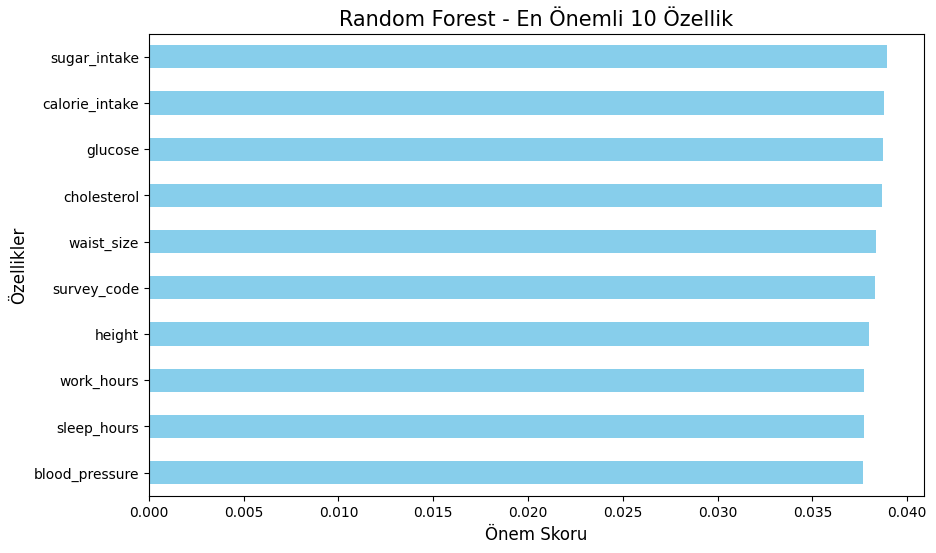

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 1. Modeli oluşturun (Henüz eğitilmedi)
# Projenin tutarlılığı için önceki karşılaştırmadakiyle aynı random_state'i kullanalım.
rf_model = RandomForestClassifier(random_state=42)

# 2. Modeli EĞİTİN (En önemli adım! Bu satır olmadan .feature_importances_ çalışmaz)
# X_train ve y_train'in daha önceki adımlarda tanımlandığını varsayıyoruz.
rf_model.fit(X_train, y_train)

# 3. Model EĞİTİLDİKTEN SONRA özellik önemlerine erişin
# Artık rf_model nesnesinin içinde 'feature_importances_' özniteliği mevcut.
importances = rf_model.feature_importances_

# 4. Sonuçları daha anlaşılır bir şekilde görselleştirin
# X_train'in sütun isimlerini kullanarak bir Pandas Serisi oluşturun.
feat_importances = pd.Series(importances, index=X.columns)

print("En Önemli 10 Özellik (Random Forest):")
print(feat_importances.nlargest(10))

# En önemli 10 özelliği alıp yatay çubuk grafiği olarak çizdirin
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarlayalım
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Random Forest - En Önemli 10 Özellik', size=15)
plt.xlabel('Önem Skoru', size=12)
plt.ylabel('Özellikler', size=12)
plt.gca().invert_yaxis() # En önemli özelliği en üste almak için
plt.show()

DERİN ÖĞRNENME

Kütüphaneleri Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Veri Yükleme ve Ön İşleme

In [16]:
# Load the data
df = pd.read_csv("cleaned_health_data .csv")

# Recreate the columns that were lost after reloading the DataFrame
# Sayısal sütunları kategorik hale getirme
from sklearn.preprocessing import KBinsDiscretizer

# Identify numeric columns to apply discretizer to, excluding those not suitable
numeric_cols_for_discretizer = ['stress_level'] # Add other numeric columns here if needed

for col_name in numeric_cols_for_discretizer:
    if col_name in df.columns and df[col_name].dtype in ['float64', 'int64']:
        discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
        # Handle potential NaN values before applying discretizer
        # Store the discretized values in a temporary variable
        discretized_values = discretizer.fit_transform(df[[col_name]].dropna()).astype(int)
        # Create a new Series with the same index as the original column, filling NaN values with a placeholder
        discretized_series = pd.Series(discretized_values.flatten(), index=df[[col_name]].dropna().index)
        # Assign the discretized values back to the original DataFrame, aligning by index
        df[f'{col_name}_category'] = discretized_series
        # Kategorik değerleri metne çevirme
        labels = {0: f'low {col_name}', 1: f'medium {col_name}', 2: f'high {col_name}'}
        df[f'{col_name}_label'] = df[f'{col_name}_category'].map(labels)
    else:
        print(f"Column '{col_name}' not found or is not numeric, skipping discretization.")


# Mevcut verilerden sentetik metin üretme
def generate_health_summary(row):
    # Safely access columns, returning None if any are missing or NaN
    try:
        return (f"{row['gender']}, {row['age']} yaşında. "
                f"BMI: {row['bmi']:.1f}. "
                f"Stres seviyesi: {row['stress_level']}/10. "
                f"Uyku kalitesi: {row['sleep_quality']}/10.")
    except KeyError:
        return None


# Apply only to rows where required columns are not NaN
required_cols_for_summary = ['stress_level', 'sleep_quality', 'gender', 'age', 'bmi']
df['health_summary'] = df.apply(lambda row: generate_health_summary(row) if pd.notna(row[required_cols_for_summary]).all() else None, axis=1)


# Özellikler ve hedef değişken
# Drop columns that are not suitable for direct use in the model or have been transformed
cols_to_drop = ['target', 'health_summary', 'stress_level_label', 'survey_code', 'outlier_count', 'cluster']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

X = df.drop(existing_cols_to_drop, axis=1)
y = df['target']

# Categorical columns to encode
categorical_cols_to_encode = ['bmi_category', 'step_category', 'gender', 'smoking_level', 'diet_type', 'exercise_type', 'job_type', 'occupation', 'education_level']
existing_categorical_cols = [col for col in categorical_cols_to_encode if col in X.columns and X[col].dtype == 'object']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=existing_categorical_cols, dummy_na=False)

# Eksik verileri doldurma
# Select only numeric columns for mean calculation
numeric_cols_for_fillna = X.select_dtypes(include=np.number).columns
X[numeric_cols_for_fillna] = X[numeric_cols_for_fillna].fillna(X[numeric_cols_for_fillna].mean())

# Drop rows where the target is NaN after dropping other columns
X = X.loc[y.dropna().index]
y = y.dropna()

# Explicitly define the final list of feature columns to ensure consistency
# This step might need manual adjustment based on the expected final columns after one-hot encoding
# For now, we'll assume all current columns in X are features
feature_columns = X.columns

# Veriyi ölçeklendirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim-test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test have the same columns as feature_columns
X_train = pd.DataFrame(X_train, columns=feature_columns)
X_test = pd.DataFrame(X_test, columns=feature_columns)

Model Mimarisi ve Eğitimi

In [13]:
from tensorflow.keras.layers import Input

# Model mimarisi
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Use an explicit Input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Binary classification output
])

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2, # Use a validation split
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6324 - loss: 0.7052 - val_accuracy: 0.7009 - val_loss: 0.6111
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6984 - loss: 0.6155 - val_accuracy: 0.7009 - val_loss: 0.6103
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7009 - loss: 0.6113 - val_accuracy: 0.7009 - val_loss: 0.6103
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7023 - loss: 0.6096 - val_accuracy: 0.7009 - val_loss: 0.6103
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7013 - loss: 0.6098 - val_accuracy: 0.7009 - val_loss: 0.6106
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7011 - loss: 0.6101 - val_accuracy: 0.7009 - val_loss: 0.6102
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7010 - loss: 0.6098 - val_accuracy: 0.7009 - val_loss: 0.6103
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7013 - l

Model Değerlendirmesi

Test Seti Doğruluğu: 0.6988


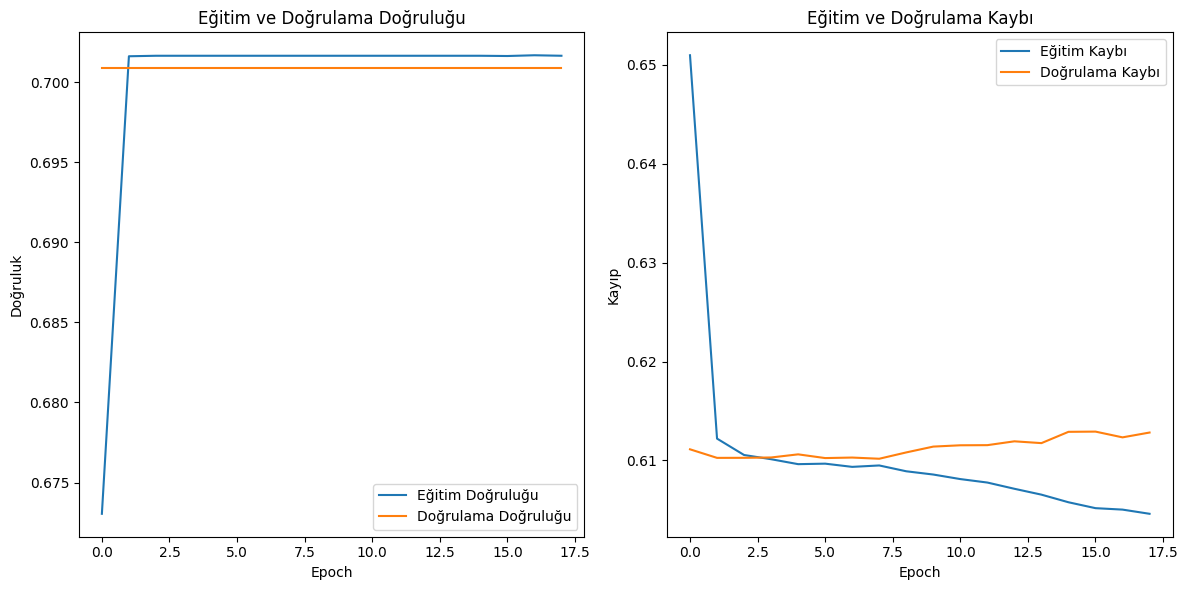

In [15]:
# Modeli test seti üzerinde değerlendirme
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Seti Doğruluğu: {accuracy:.4f}")

# Eğitim geçmişini görselleştirme
import matplotlib.pyplot as plt # Import matplotlib.pyplot
plt.figure(figsize=(12, 6))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

Hiperparametre Optimizasyonu

In [17]:
# Keras Tuner ile otomatik tuning
!pip install keras-tuner
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=256, step=32),
               activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=30, validation_split=0.2)

# En iyi modeli al
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 04m 13s]
val_accuracy: 0.7008749842643738

Best val_accuracy So Far: 0.7008749842643738
Total elapsed time: 00h 21m 10s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Çapraz Doğrulama (Cross-Validation)

In [19]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=10)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7024 - loss: 0.6085 - val_accuracy: 0.6974 - val_loss: 0.6125
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.7046 - loss: 0.6057 - val_accuracy: 0.6974 - val_loss: 0.6123
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7037 - loss: 0.6065 - val_accuracy: 0.6974 - val_loss: 0.6129
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7037 - loss: 0.6060 - val_accuracy: 0.6974 - val_loss: 0.6129
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7006 - loss: 0.6080 - val_accuracy: 0.6974 - val_loss: 0.6136
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7021 - loss: 0.6064 - val_accuracy: 0.6974 - val_loss: 0.6134
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7060 - loss: 0.6025 - val_accuracy: 0.6974 - val_loss: 0.6130
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7003 - loss: 0.

Öğrenme Oranı Zamanlaması

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Use X_train and y_train for training, and include the callback
model.fit(X_train, y_train, callbacks=[LearningRateScheduler(lr_scheduler)])

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7016 - loss: 0.5980 - learning_rate: 0.0010


Karışıklık Matrisi (Confusion Matrix)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


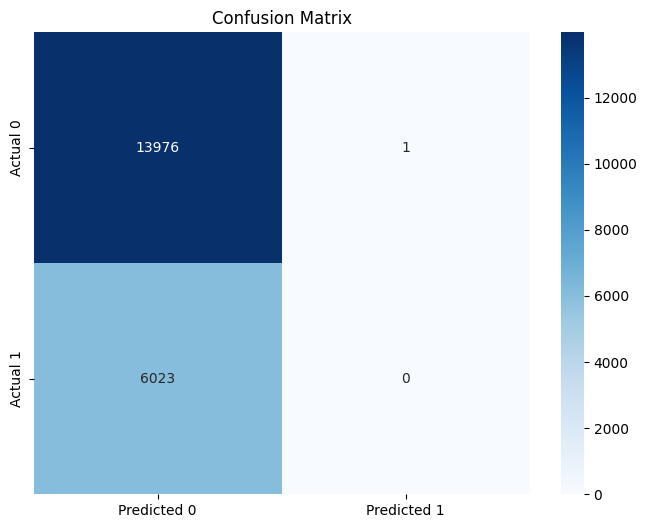

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Tahminleri al
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Binary için
cm = confusion_matrix(y_test, y_pred)

# Heatmap olarak çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

ROC Eğrisi ve AUC Skoru

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


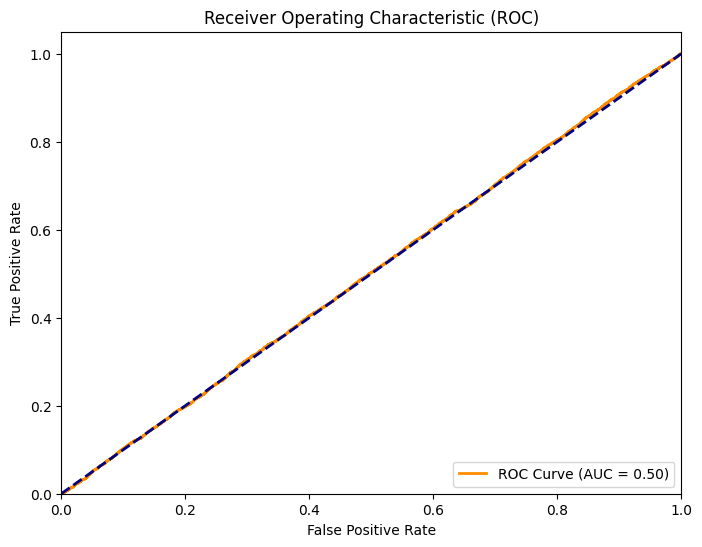

In [23]:
from sklearn.metrics import roc_curve, auc

# ROC hesapla
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Çizdir
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Sınıf Dağılımları (Data Imbalance Check)

/tmp/ipython-input-24-3980280999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_dist.index, y=class_dist.values, palette="viridis")


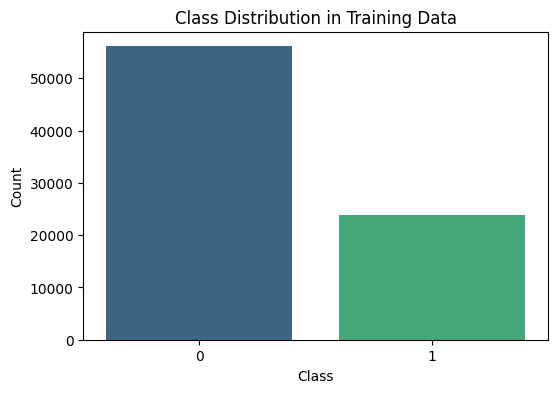

In [24]:
import pandas as pd

# Sınıf dağılımını kontrol et
class_dist = pd.Series(y_train).value_counts()

# Barplot çiz
plt.figure(figsize=(6, 4))
sns.barplot(x=class_dist.index, y=class_dist.values, palette="viridis")
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()